<a href="https://colab.research.google.com/github/Umaporn19/Project/blob/main/(TEST)_Unfreeze100_Train_id2_id6_id8_id10_Test_id12_500_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

In [10]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [11]:
df = pd.read_csv (r'/content/drive/MyDrive/data/Part/id_all.csv')
df

,Unnamed: 0,Path_Name,id,Part
0,0,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
1,1,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
2,2,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
3,3,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
4,4,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
...,...,...,...,...
243523,243523,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243524,243524,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243525,243525,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243526,243526,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09


In [12]:
import sys
sys.path.append('/content/drive/My Drive/Model/Unfreeze100_Train_id2_id6_id8_id10_Test_id12_500_new.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [13]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Model/Unfreeze100_Train_id2_id6_id8_id10_Test_id12_500_new.h5')
height = width = model.input_shape[1]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [14]:
DATA_PATH = "/content/drive/My Drive/id"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/id/train
/content/drive/My Drive/id/test


In [15]:
train = df[df['Unnamed: 0'].between(0,190079)]
test = df[df['Unnamed: 0'].between(190080,243527)]

In [16]:
batch_size = 1

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
        

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [17]:
test = df[df['Unnamed: 0'].between(190080,243527)]
test

,Unnamed: 0,Path_Name,id,Part
190080,190080,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
190081,190081,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
190082,190082,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
190083,190083,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
190084,190084,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
...,...,...,...,...
243523,243523,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243524,243524,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243525,243525,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243526,243526,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09


In [18]:
act = test['Part'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [19]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [20]:
predict_image(path[0])[0]

1/1 [==============================] - 3s 3s/step


5.7353204e-06

In [21]:
import numpy as np

In [22]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 31ms/step


In [23]:
pred_list

['p13',
 'p13',
 'p14',
 'p14',
 'p13',
 'p13',
 'p14',
 'p13',
 'p14',
 'p14',
 'p13',
 'p13',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p13',
 'p14',
 'p13',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p13',
 'p14',
 'p14',
 'p13',
 'p14',
 'p14',
 'p13',
 'p13',
 'p14',
 'p13',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p13',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p13',
 'p13',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p13',
 'p13',
 'p13',
 'p14',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p14',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',
 'p14',
 'p13',
 'p14',
 'p13',
 'p13',
 'p13',
 'p14',
 'p14',
 'p14',
 'p14',


In [24]:
import numpy as np

In [25]:
pred = np.array(pred_list)
act = np.array(act)

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 34.781469839844334%
              precision    recall  f1-score   support

         p01       1.00      0.00      0.01      3558
         p02       1.00      0.03      0.05      3559
         p03       0.42      0.19      0.27      3564
         p04       0.43      0.63      0.51      3564
         p05       0.00      0.01      0.00      3564
         p06       0.08      0.11      0.09      3564
         p07       0.47      0.89      0.61      3564
         p08       0.02      0.00      0.00      3564
         p09       0.02      0.00      0.00      3564
         p10       0.22      0.11      0.14      3564
         p11       0.41      0.79      0.54      3564
         p12       0.00      0.00      0.00      3564
         p13       0.31      0.45      0.36      3564
         p14       0.40      1.00      0.57      3563
         p15       1.00      1.00      1.00      3564

    accuracy                           0.35     53448
   macro avg       0.39      0.35     

Text(0.5, 66.5, 'Predicted label')

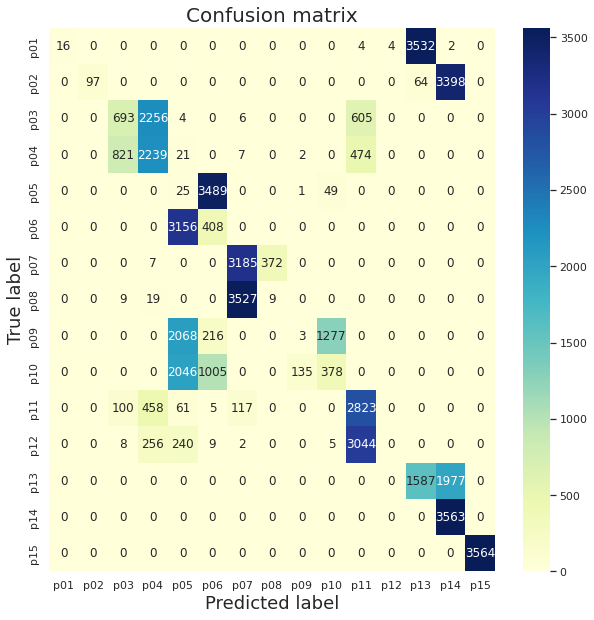

In [27]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)